Average energy: -81.1284


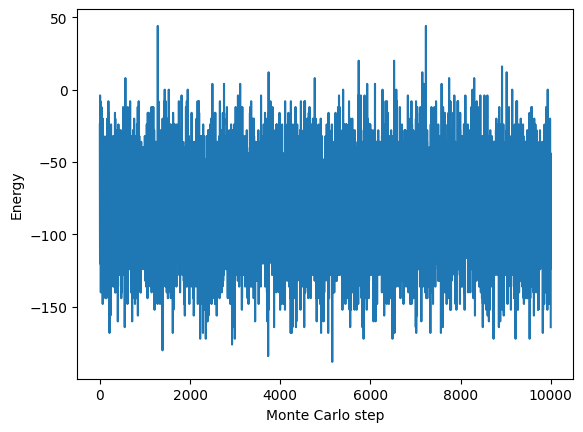

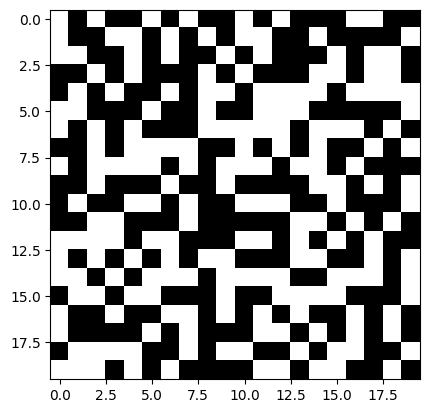

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = 20 # number of spins in each direction
J = -1 # coupling constant
beta = 0.1 # inverse temperature
nsteps = 10000 # number of Monte Carlo steps

# Initialize the spins randomly
spins = np.random.choice([-1, 1], size=(N, N))

# Define the energy function
def energy(spins):
    return -J * (np.sum(spins[:-1,:] * spins[1:,:]) + np.sum(spins[:,:-1] * spins[:,1:])) \
           - J * (np.sum(spins[0,:] * spins[-1,:]) + np.sum(spins[:,0] * spins[:,-1]))

# Define the Metropolis algorithm
def metropolis(spins, beta):
    for i in range(N):
        for j in range(N):
            # Choose a random spin to flip
            x, y = np.random.randint(0, N), np.random.randint(0, N)
            # Calculate the energy difference
            delta_E = 2 * J * spins[x, y] * \
                      (spins[(x+1)%N, y] + spins[(x-1)%N, y] + spins[x, (y+1)%N] + spins[x, (y-1)%N])
            # Flip the spin with probability according to the Boltzmann factor
            if np.random.uniform(0, 1) < np.exp(-beta * delta_E):
                spins[x, y] = -spins[x, y]
    return spins

# Run the Monte Carlo simulation
energies = []
for i in range(nsteps):
    spins = metropolis(spins, beta)
    energies.append(energy(spins))

# Calculate the average energy
E = np.mean(energies)

# Print the result
print(f"Average energy: {E:.4f}")

# Plot the energy as a function of Monte Carlo steps
plt.plot(energies)
plt.xlabel("Monte Carlo step")
plt.ylabel("Energy")
plt.show()

# Plot the spin configuration
plt.imshow(spins, cmap='binary')
plt.show()

Average energy: -23.8855


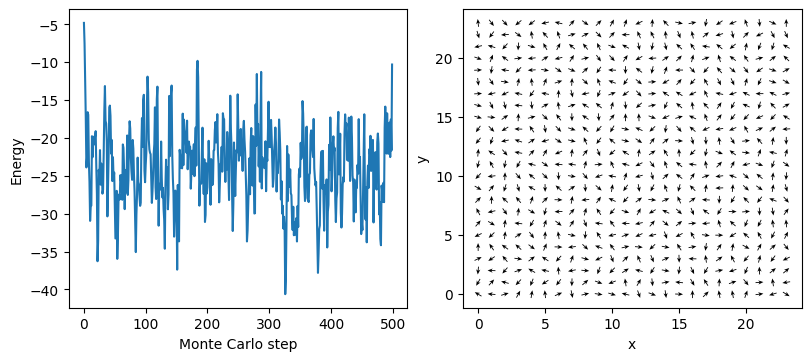

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = 24  # number of spins in each direction
J = 0.1  # coupling constant
T = 1  # temperature
nsteps = 500  # number of Monte Carlo steps

# Initialize the angles randomly
angles = np.random.uniform(0, 2*np.pi, size=(N, N))

# Define the energy function
def energy(angles):
    cos_diff = np.cos(angles - np.roll(angles, 1, axis=0)) + np.cos(angles - np.roll(angles, -1, axis=0)) \
               + np.cos(angles - np.roll(angles, 1, axis=1)) + np.cos(angles - np.roll(angles, -1, axis=1))
    return -J * np.sum(cos_diff)

# Define the Metropolis algorithm
def metropolis(angles, T):
    for i in range(N):
        for j in range(N):
            # Choose a random angle to update
            x, y = np.random.randint(0, N), np.random.randint(0, N)
            # Calculate the energy difference
            old_energy = energy(angles)
            new_angles = np.copy(angles)
            new_angles[x, y] = (np.random.uniform(0, 2*np.pi*0.25) + angles[x, y]) % (2*np.pi)
            new_energy = energy(new_angles)
            delta_E = new_energy - old_energy
            # Rotate the angle with probability according to the Boltzmann factor
            if delta_E < 0 or np.random.uniform(0, 1) < np.exp(-delta_E / T):
                angles = np.copy(new_angles)
    return angles

# Run the Monte Carlo simulation
energies = []
for i in range(nsteps):
    angles = metropolis(angles, T)
    energies.append(energy(angles))

# Calculate the average energy
E = np.mean(energies)

# Print the result
print(f"Average energy: {E:.4f}")

# Plot the energy as a function of Monte Carlo steps
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5), layout='constrained')
plt.sca(axs[0])
plt.plot(energies)
plt.xlabel("Monte Carlo step")
plt.ylabel("Energy")
# plt.show()

# Plot the spin configuration
plt.sca(axs[1])
x, y = np.meshgrid(range(N), range(N))
plt.quiver(x, y, np.cos(angles), np.sin(angles), pivot='mid', headwidth=5, headlength=6)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

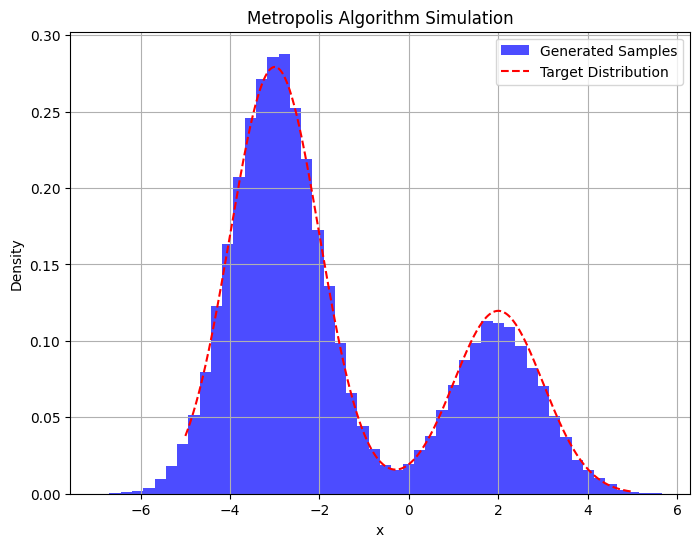

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(x):
    """目标分布函数"""
    return 0.7*(1/np.sqrt(2*np.pi) * np.exp(-0.5 * (x + 3)**2))+ 0.3*(1/np.sqrt(2*np.pi) * np.exp(-0.5 * (x - 2)**2))

def proposal_distribution(x):
    """提议分布函数，这里选择简单的标准正态分布"""
    return np.random.normal(x, 1)

def metropolis_algorithm(num_samples, initial_state):
    samples = [initial_state]
    current_state = initial_state
    for _ in range(num_samples):
        proposed_state = proposal_distribution(current_state)
        acceptance_prob = min(1, target_distribution(proposed_state) / target_distribution(current_state))
        if np.random.rand() < acceptance_prob:
            current_state = proposed_state
        samples.append(current_state)
    return np.array(samples)

# 设置随机数种子以确保结果可重复
np.random.seed(42)

# 运行Metropolis算法以生成样本
num_samples = 100000
initial_state = np.random.randn()
samples = metropolis_algorithm(num_samples, initial_state)

# 绘制生成的样本分布
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue', label='Generated Samples')
x = np.linspace(-5, 5, 1000)
plt.plot(x, target_distribution(x), color='red', linestyle='--', label='Target Distribution')
plt.title('Metropolis Algorithm Simulation')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Testing with x0 = -7.87
 num_steps NRMSD     
       500 21.3%
      5000 12.1%
     50000  2.0%


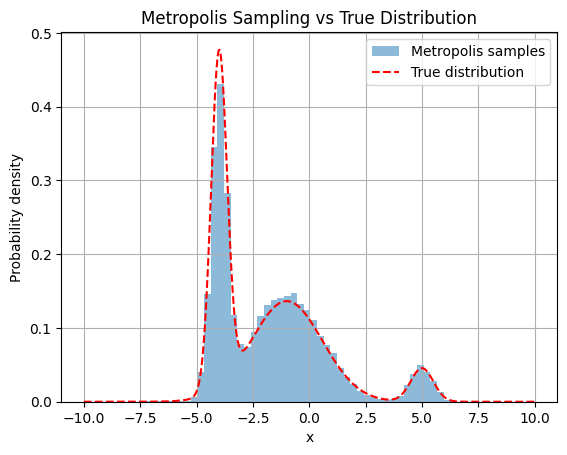

In [6]:
import numpy as np


def f(x, normalize=False):
    '''
    Function proportional to target distribution, a sum of Gaussians.
    For testing, set normalize to True, to get target distribution exactly.
    '''
    # Gaussian heights, width parameters, and mean positions respectively:
    a = np.array([10., 3., 1.]).reshape(3, 1)
    b = np.array([ 4., 0.2, 2.]).reshape(3, 1)
    xs = np.array([-4., -1., 5.]).reshape(3, 1)

    if normalize:
        norm = (np.sqrt(np.pi) * (a / np.sqrt(b))).sum()
        a /= norm

    return (a * np.exp(-b * (x - xs)**2)).sum(axis=0)

def g():
    '''Random step vector.'''
    return np.random.uniform(-1,1)

def metropolis_step(x, f=f, g=g):
    '''Perform one full iteration and return new position.'''

    x_proposed = x + g()
    a = min(1, (f(x_proposed) / f(x)).item())

    x_new = np.random.choice([x_proposed, x], p=[a, 1-a])

    return x_new

def metropolis_iterate(x0, num_steps):
    '''Iterate metropolis algorithm for num_steps using iniital position x_0'''

    for n in range(num_steps):
        if n == 0:
            x = x0
        else:
            x = metropolis_step(x)
        yield x


def test_metropolis_iterate(num_steps, xmin, xmax, x0):
    '''
    Calculate error in normalized density histogram of data  
    generated by metropolis_iterate() by using 
    normalized-root-mean-square-deviation metric. 
    '''

    bin_width = 0.25
    bins = np.arange(xmin, xmax + bin_width/2, bin_width)
    centers = np.arange(xmin + bin_width/2, xmax, bin_width)

    true_values = f(centers, normalize=True)
    mean_value = np.mean(true_values - min(true_values))

    x_dat = list(metropolis_iterate(x0, num_steps))
    heights, _ = np.histogram(x_dat, bins=bins, density=True)

    nmsd = np.average((heights - true_values)**2 / mean_value)
    nrmsd = np.sqrt(nmsd)

    return nrmsd



if __name__ == "__main__":
    xmin, xmax = -10, 10
    x0 = np.random.uniform(xmin, xmax)

    num_steps = 50_000

    x_dat = list(metropolis_iterate(x0, 50_000))

    # Write data to file
    output_string = "\n".join(str(x) for x in x_dat)

    with open("output.dat", "w") as out:
        out.write(output_string)
        out.write("\n")


    # Testing
    print(f"Testing with x0 = {x0:5.2f}")
    print(f"{'num_steps':>10s} {'NRMSD':10s}")
    for num_steps in (500, 5_000, 50_000):
        nrmsd = test_metropolis_iterate(num_steps, xmin, xmax, x0)
        print(f"{num_steps:10d} {nrmsd:5.1%}")
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
x_dat = np.loadtxt("output.dat")

def f_true(x):
    '''真实概率密度函数'''
    return f(x, normalize=True)

# 生成真实分布的数据点
x_values = np.linspace(-10, 10, 1000)
true_values = f_true(x_values)

# 绘制直方图
plt.hist(x_dat, bins=50, density=True, alpha=0.5, label='Metropolis samples')

# 绘制真实分布
plt.plot(x_values, true_values, 'r--', label='True distribution')

plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Metropolis Sampling vs True Distribution')
plt.legend()
plt.grid(True)
plt.show()

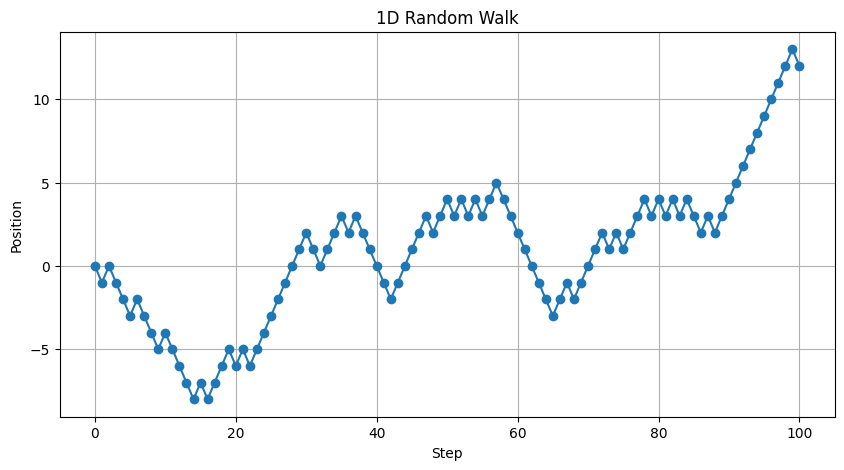

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以便复现结果
np.random.seed(42)

# 模拟的步数
n_steps = 100

# 生成随机步骤，+1 或 -1
steps = np.random.choice([-1, 1], size=n_steps)

# 计算位置：从0开始，累加每一步的移动
positions = np.cumsum(steps)
positions = np.insert(positions, 0, 0)  # 在开始加上原点0

# 绘图
plt.figure(figsize=(10, 5))
plt.plot(positions, marker='o', linestyle='-')
plt.title("1D Random Walk")
plt.xlabel("Step")
plt.ylabel("Position")
plt.grid(True)
plt.show()


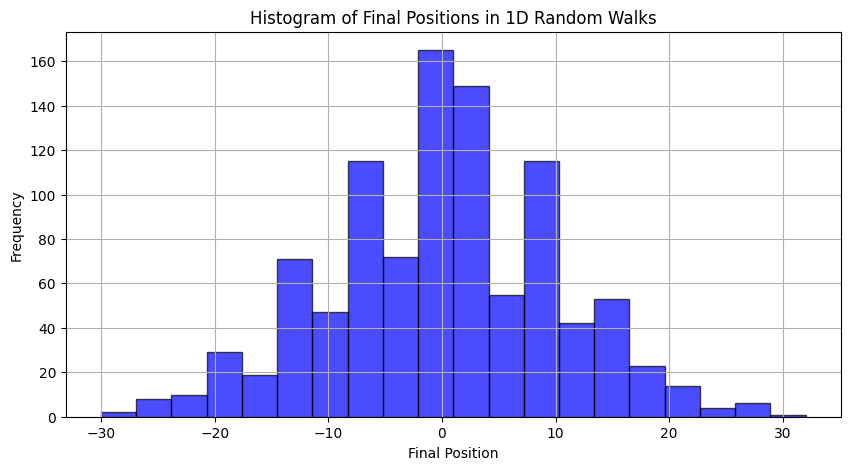

In [11]:
# 模拟的随机游走数量
n_walks = 1000

# 生成所有随机游走的步骤
all_steps = np.random.choice([-1, 1], size=(n_walks, n_steps))

# 计算每个游走的最终位置
final_positions = np.sum(all_steps, axis=1)

# 绘制直方图
plt.figure(figsize=(10, 5))
plt.hist(final_positions, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogram of Final Positions in 1D Random Walks")
plt.xlabel("Final Position")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


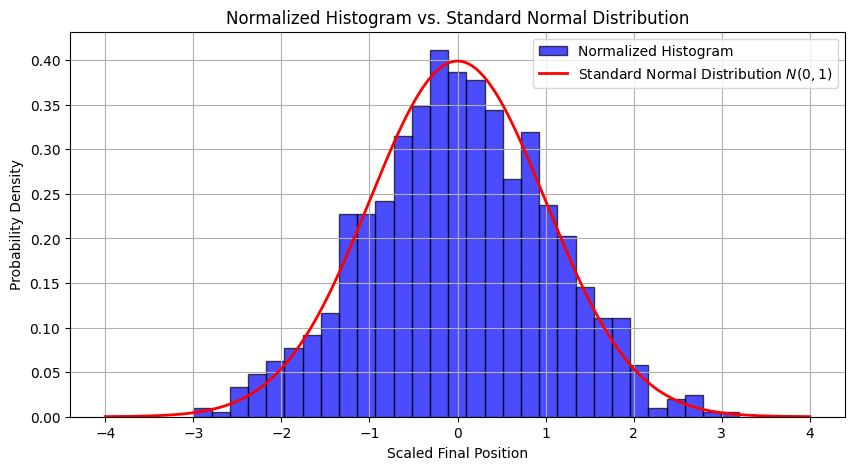

In [12]:
from scipy.stats import norm

# 计算步数的平方根作为标准偏差
sigma = np.sqrt(n_steps)

# 缩放最终位置以模拟N(0,1)
scaled_positions = final_positions / sigma

# 绘制归一化直方图
plt.figure(figsize=(10, 5))
count, bins, ignored = plt.hist(scaled_positions, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black', label="Normalized Histogram")

# 绘制标准正态分布曲线
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x, 0, 1), 'r-', lw=2, label="Standard Normal Distribution $N(0,1)$")

plt.title("Normalized Histogram vs. Standard Normal Distribution")
plt.xlabel("Scaled Final Position")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import numpy as np

# 定义常数
h_bar = 1.0   # 约化普朗克常数
m = 1.0       # 质量
omega = 1.0   # 谐振频率
beta = 2.0    # 反温度

# 定义势能函数
def potential(x):
    return 0.5 * m * omega**2 * x**2

# 初始化参数
x_walkers = np.random.uniform(-5, 5, size=1000)  # 初始位置
delta = 1.0                                      # 步长

# 定义Metropolis采样算法
def metropolis(x, delta):
    x_new = x + np.random.uniform(-delta, delta)
    acceptance_ratio = np.exp(-beta * (potential(x_new) - potential(x)))
    if np.random.uniform(0, 1) < acceptance_ratio:
        return x_new
    else:
        return x

# 进行采样
num_steps = 10000
for step in range(num_steps):
    x_walkers = np.array([metropolis(x, delta) for x in x_walkers])

# 计算能量
kinetic_energy = 0.5 * np.mean(np.square(x_walkers)) / m
potential_energy = np.mean(potential(x_walkers))
total_energy = kinetic_energy + potential_energy

print("基态能量:", total_energy)


基态能量: 0.4902805392271441


In [14]:
import numpy as np

# 定义常数
h_bar = 1.0     # 约化普朗克常数
m = 1.0         # 电子质量
beta = 2.0      # 反温度
num_particles = 2  # 电子数

# 定义势能函数
def potential(r1, r2):
    r12 = np.linalg.norm(r1 - r2)
    return -2.0 / r12  # 氦原子的库伦势能

# 初始化参数
r_walkers = np.random.uniform(-5, 5, size=(num_particles, 3))  # 初始位置
delta = 1.0                                                    # 步长

# 定义Metropolis采样算法
def metropolis(r, delta):
    r_new = r + np.random.uniform(-delta, delta, size=r.shape)
    acceptance_ratio = np.exp(-beta * (potential(r_new[0], r_new[1]) - potential(r[0], r[1])))
    if np.random.uniform(0, 1) < acceptance_ratio:
        return r_new
    else:
        return r

# 进行采样
num_steps = 10000
for step in range(num_steps):
    r_walkers = np.array([metropolis(r, delta) for r in r_walkers])

# 计算能量
kinetic_energy = 0.5 * np.mean(np.sum(np.square(r_walkers), axis=1)) / m
potential_energy = np.mean(potential(r_walkers[0], r_walkers[1]))
total_energy = kinetic_energy + potential_energy

print("基态能量:", total_energy)


C:\Users\25838\AppData\Local\Temp\ipykernel_1996\2235891759.py:21: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp(-beta * (potential(r_new[0], r_new[1]) - potential(r[0], r[1])))


基态能量: 28.831316691070832
